In [1]:
# Import library for exploring dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv("/content/house(1).csv")
df2 = pd.read_csv("/content/house(2).csv")


In [3]:
common_column = 'id'
df = pd.merge(df1, df2, on=common_column)
df.replace(['?', '/', '#'], np.nan, inplace=True)

In [4]:
df.head(10)

,id,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,...,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above
0,7129300520,0,1955,0,98178,47.5112,-122.257,1340,5650,20141013T000000,...,3.0,NaN,1180,5650,NaN,0,0,3,7,1180
1,6414100192,400,1951,1991,98125,47.7210,-122.319,1690,7639,20141209T000000,...,3.0,2.25,2570,7242,2.0,0,0,3,7,2170
2,5631500400,0,1933,0,98028,47.7379,-122.233,2720,8062,20150225T000000,...,2.0,NaN,770,10000,NaN,0,0,3,6,770
3,2487200875,910,1965,0,98136,47.5208,-122.393,1360,5000,20141209T000000,...,4.0,NaN,1960,5000,NaN,0,0,5,7,1050
4,1954400510,0,1987,0,98074,47.6168,-122.045,1800,7503,20150218T000000,...,3.0,2.00,1680,8080,1.0,0,0,3,8,1680
5,7237550310,1530,2001,0,98053,47.6561,-122.005,4760,101930,20140512T000000,...,4.0,4.50,5420,101930,1.0,0,0,3,11,3890
6,1321400060,0,1995,0,98003,47.3097,-122.327,2238,6819,20140627T000000,...,3.0,NaN,1715,6819,2.0,0,0,3,7,1715
7,2008000270,0,1963,0,98198,47.4095,-122.315,1650,9711,20150115T000000,...,3.0,NaN,1060,9711,1.0,0,0,3,7,1060
8,2414600126,730,1960,0,98146,47.5123,-122.337,1780,8113,20150415T000000,...,3.0,1.00,1780,7470,1.0,0,0,3,7,1050
9,3793500160,0,2003,0,98038,47.3684,-122.031,2390,7570,20150312T000000,...,3.0,2.50,1890,6560,2.0,0,0,3,7,1890


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21969 entries, 0 to 21968
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21969 non-null  int64  
 1   sqft_basement  21969 non-null  int64  
 2   yr_built       21969 non-null  int64  
 3   yr_renovated   21969 non-null  int64  
 4   zipcode        21969 non-null  int64  
 5   lat            21969 non-null  float64
 6   long           21969 non-null  float64
 7   sqft_living15  21969 non-null  int64  
 8   sqft_lot15     21969 non-null  int64  
 9   date           21969 non-null  object 
 10  price          21969 non-null  float64
 11  bedrooms       15273 non-null  float64
 12  bathrooms      14353 non-null  float64
 13  sqft_living    21969 non-null  int64  
 14  sqft_lot       21969 non-null  int64  
 15  floors         17107 non-null  float64
 16  waterfront     21562 non-null  object 
 17  view           21969 non-null  int64  
 18  condit

In [6]:
df['yr_renovated'].value_counts()

0       21047
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [7]:
df.isnull().sum()

id                  0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
bedrooms         6696
bathrooms        7616
sqft_living         0
sqft_lot            0
floors           4862
waterfront        407
view                0
condition           0
grade               0
sqft_above          0
dtype: int64

In [8]:
df['floors'].value_counts()

1.0    8485
2.0    6513
1.5    1498
3.0     476
2.5     128
3.5       7
Name: floors, dtype: int64

In [9]:
# Calculate the mode
mode_val = df['floors'].mode()[0]

# Fill the null values
df['floors'].fillna(mode_val, inplace=True)

In [10]:
df['bedrooms'].value_counts()

3.0     6933
4.0     4816
2.0     1955
5.0     1154
6.0      212
1.0      153
7.0       26
8.0        9
0.0        9
9.0        4
11.0       1
10.0       1
Name: bedrooms, dtype: int64

In [11]:
# Calculate the mode
mode_val = df['bedrooms'].mode()[0]

# Fill the null values
df['bedrooms'].fillna(mode_val, inplace=True)

In [12]:
df['bathrooms'].value_counts()

2.50    3553
1.00    2614
1.75    2037
2.25    1340
2.00    1272
1.50     968
2.75     770
3.00     506
3.50     467
3.25     395
3.75      96
4.00      88
4.50      68
4.25      61
0.75      45
4.75      14
5.00      11
5.50       9
5.25       9
6.00       6
0.00       6
1.25       6
5.75       3
8.00       2
0.50       2
6.75       1
7.50       1
7.75       1
6.25       1
6.50       1
Name: bathrooms, dtype: int64

In [13]:
# Calculate the mode
mode_val = df['bathrooms'].mode()[0]

# Fill the null values
df['bathrooms'].fillna(mode_val, inplace=True)

In [14]:
df['waterfront'].value_counts()

0    21403
1      159
Name: waterfront, dtype: int64

In [15]:
# Calculate the mode
mode_val = df['waterfront'].mode()[0]

# Fill the null values
df['waterfront'].fillna(mode_val, inplace=True)

In [16]:
df.isnull().any()

id               False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
lat              False
long             False
sqft_living15    False
sqft_lot15       False
date             False
price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
dtype: bool

In [17]:
df.describe()

,id,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above
count,2.196900e+04,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000,2.196900e+04,21969.000000,21969.000000,21969.000000,2.196900e+04,21969.000000,21969.000000,21969.000000,21969.000000,21969.000000
mean,4.579052e+09,291.023032,1970.821157,83.755383,98078.099276,47.559845,-122.214296,1983.030771,12733.700396,5.380970e+05,3.257636,2.244424,2074.334426,1.505021e+04,1.383427,0.232692,3.407438,7.647139,1783.311393
std,2.876614e+09,442.159118,29.348721,400.189783,53.578651,0.138485,0.140693,684.801400,27163.313081,3.663890e+05,0.781820,0.653456,917.044924,4.118718e+04,0.517952,0.764770,0.651837,1.177961,826.228751
min,1.000102e+06,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,1.000000,1.000000,290.000000
25%,2.122059e+09,0.000000,1951.000000,0.000000,98033.000000,47.470500,-122.329000,1480.000000,5100.000000,3.200000e+05,3.000000,1.750000,1420.000000,5.050000e+03,1.000000,0.000000,3.000000,7.000000,1190.000000
50%,3.904940e+09,0.000000,1974.000000,0.000000,98065.000000,47.571200,-122.231000,1830.000000,7620.000000,4.500000e+05,3.000000,2.500000,1910.000000,7.620000e+03,1.000000,0.000000,3.000000,7.000000,1560.000000
75%,7.309100e+09,560.000000,1996.000000,0.000000,98118.000000,47.677900,-122.126000,2360.000000,10080.000000,6.410000e+05,4.000000,2.500000,2540.000000,1.067500e+04,2.000000,0.000000,4.000000,8.000000,2200.000000
max,9.900000e+09,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,9410.000000


In [18]:
# remove id and date features
df.drop(["id"], axis=1, inplace=True)


In [19]:
# defining numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 18 numerical features : ['sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade', 'sqft_above']

We have 2 categorical features : ['date', 'waterfront']


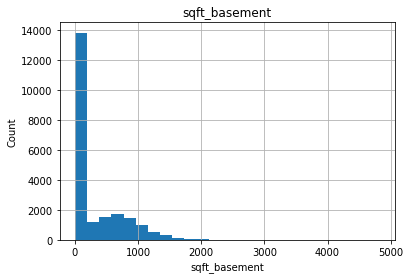

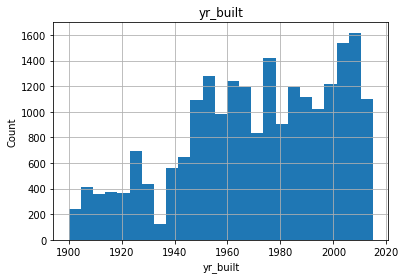

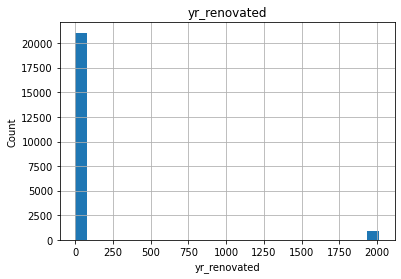

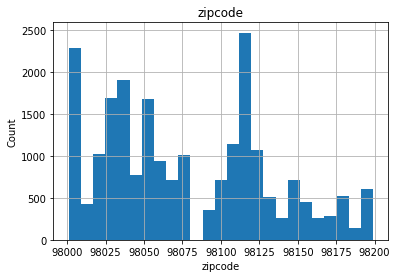

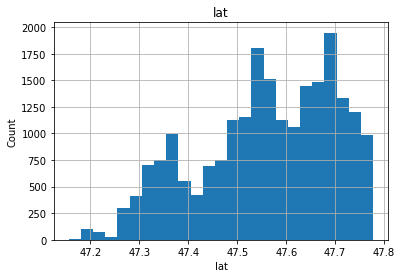

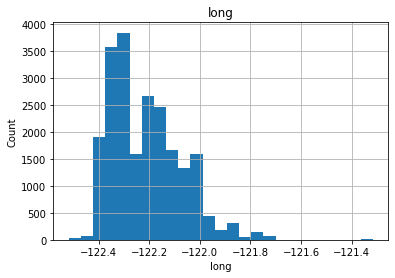

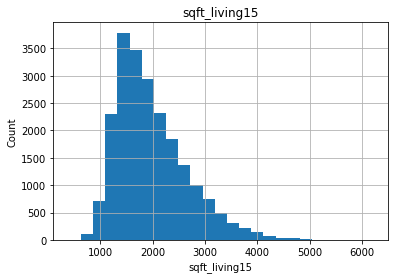

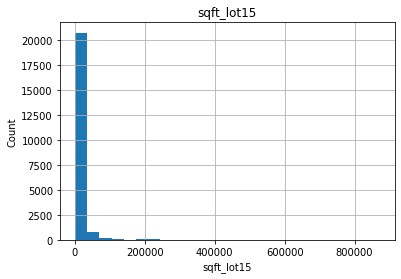

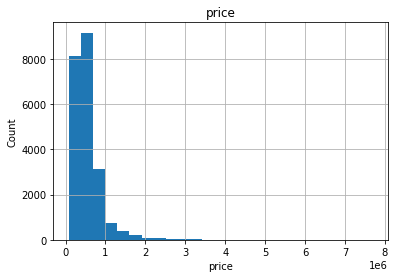

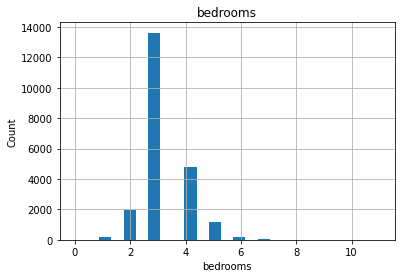

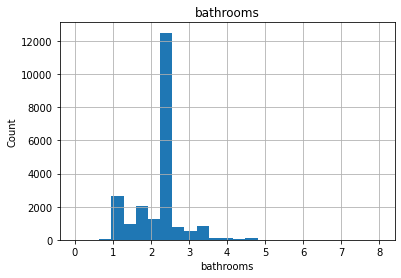

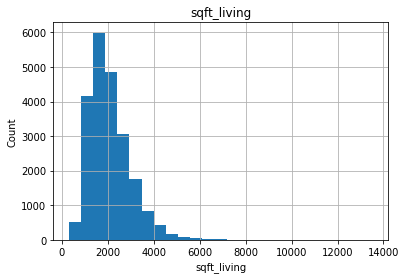

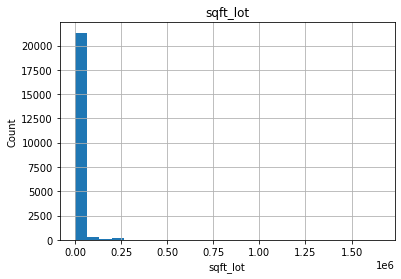

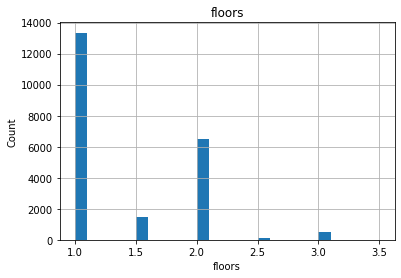

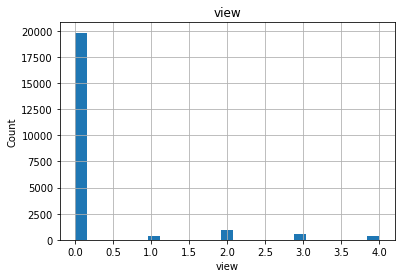

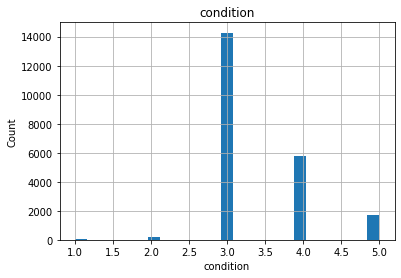

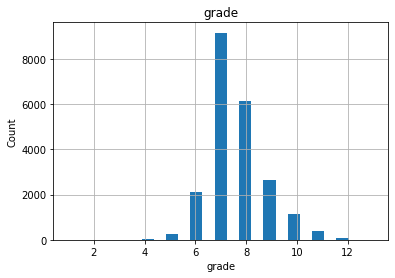

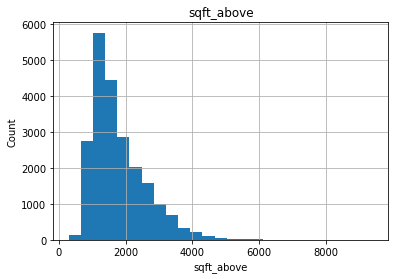

In [20]:
#check the distribution of numerical features in dataset
for feature in numeric_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

<AxesSubplot:xlabel='date', ylabel='count'>

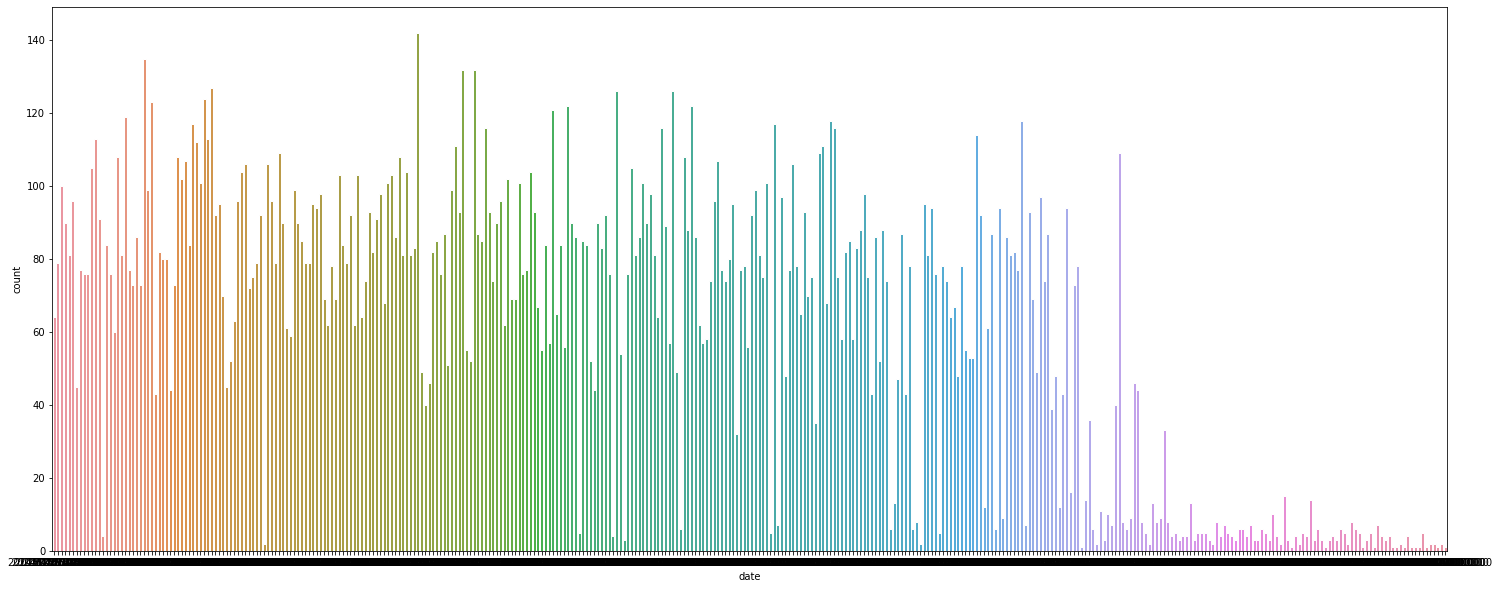

In [21]:
fig, ax = plt.subplots(figsize=(25, 10))
sns.set_style('whitegrid')
sns.countplot(x='date',data=df,ax=ax)

<AxesSubplot:xlabel='waterfront', ylabel='count'>

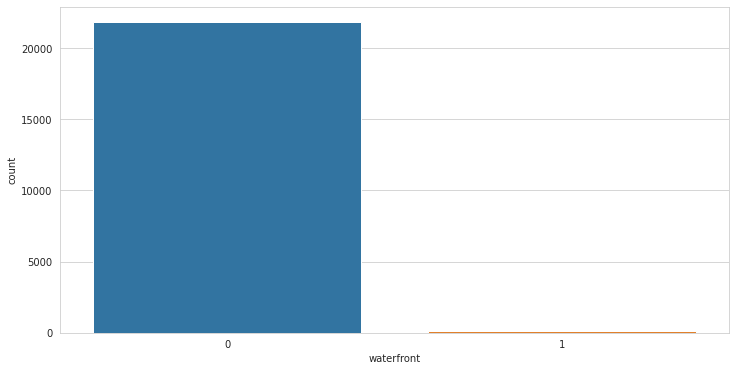

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_style('whitegrid')
sns.countplot(x='waterfront',data=df,ax=ax)

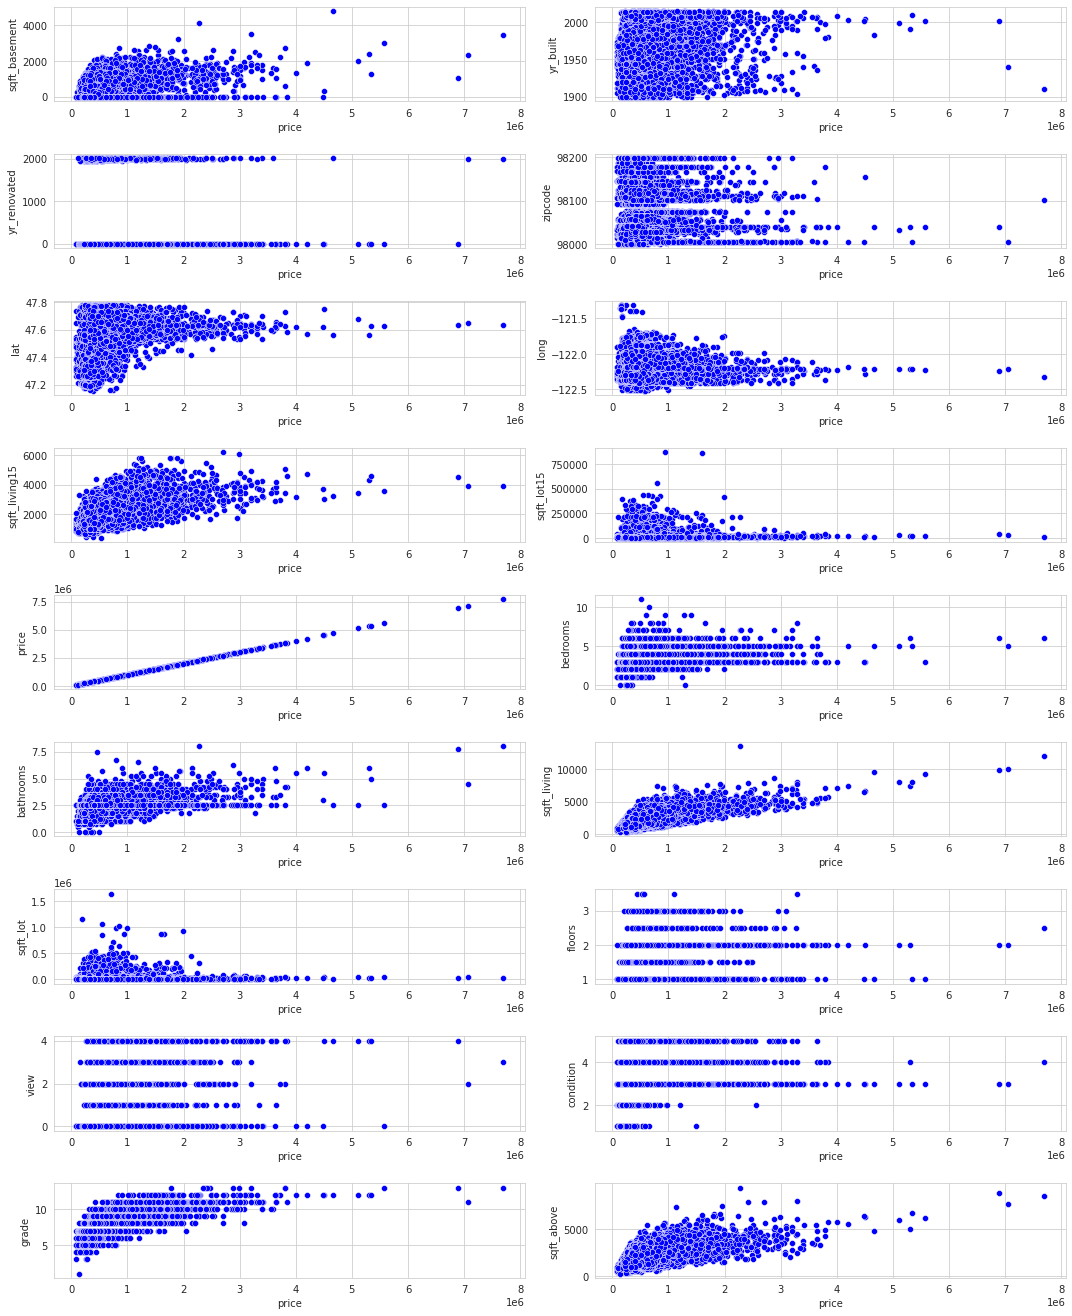

In [23]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(numeric_features)):
    ax = plt.subplot(10, 2, i+1)

    sns.scatterplot(data= df ,x='price', y=numeric_features[i], color='b')
  
    plt.tight_layout()

<AxesSubplot:xlabel='price', ylabel='Count'>

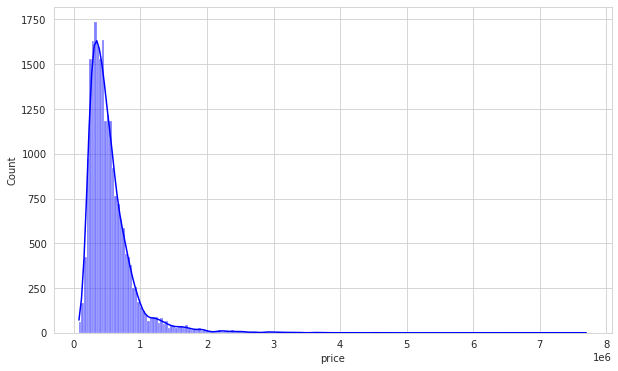

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style('whitegrid')
sns.histplot(x='price', bins=200, kde=True, color = 'b',data=df,ax=ax)


<AxesSubplot:xlabel='zipcode', ylabel='price'>

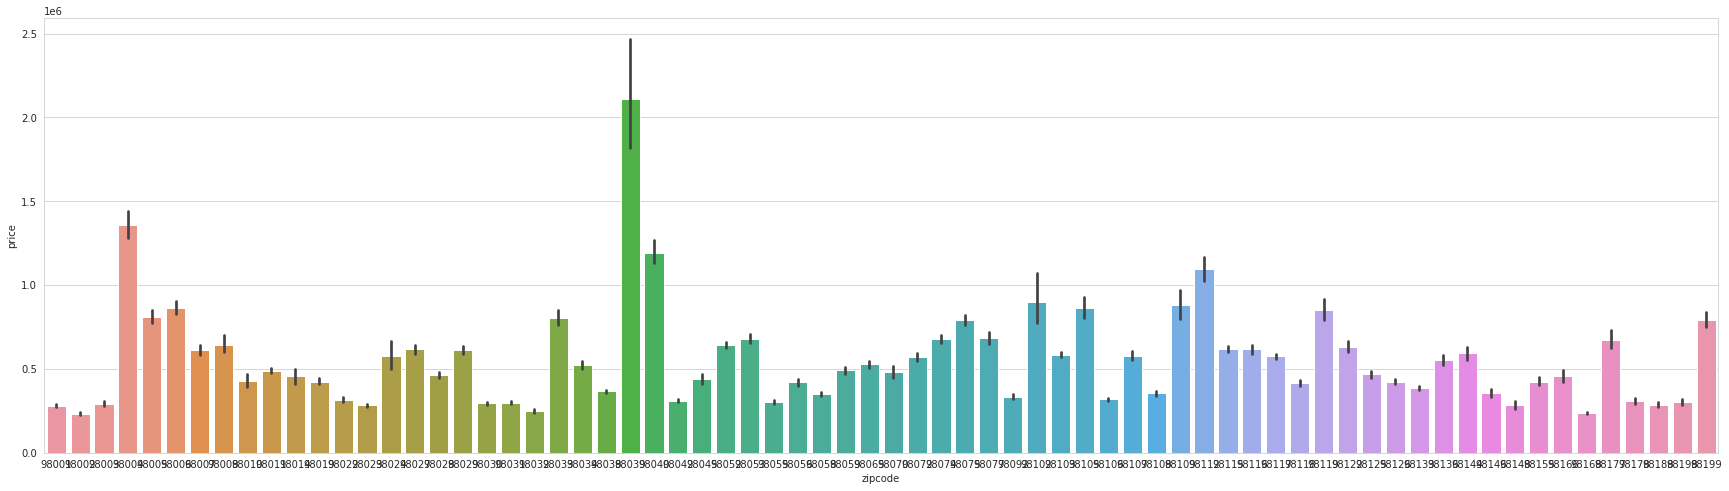

In [25]:
fig, ax = plt.subplots(figsize=(30,8))
sns.set_style('whitegrid')
sns.barplot(x=df.zipcode, y=df.price)

In [26]:
# check for duplicates
df.duplicated().sum()


356

In [27]:
# drop duplicates
df.drop_duplicates(inplace=True)


In [28]:
# convert date to datetime object
df["date"] = pd.to_datetime(df["date"])




In [29]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [30]:
df.head(10)

,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above
0,0,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13,221900.0,3.0,2.50,1180,5650,1.0,0,0,3,7,1180
1,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,7,2170
2,0,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25,180000.0,2.0,2.50,770,10000,1.0,0,0,3,6,770
3,910,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09,604000.0,4.0,2.50,1960,5000,1.0,0,0,5,7,1050
4,0,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,8,1680
5,1530,2001,0,98053,47.6561,-122.005,4760,101930,2014-05-12,1225000.0,4.0,4.50,5420,101930,1.0,0,0,3,11,3890
6,0,1995,0,98003,47.3097,-122.327,2238,6819,2014-06-27,257500.0,3.0,2.50,1715,6819,2.0,0,0,3,7,1715
7,0,1963,0,98198,47.4095,-122.315,1650,9711,2015-01-15,291850.0,3.0,2.50,1060,9711,1.0,0,0,3,7,1060
8,730,1960,0,98146,47.5123,-122.337,1780,8113,2015-04-15,229500.0,3.0,1.00,1780,7470,1.0,0,0,3,7,1050
9,0,2003,0,98038,47.3684,-122.031,2390,7570,2015-03-12,323000.0,3.0,2.50,1890,6560,2.0,0,0,3,7,1890


In [31]:
# remove id and date features
df.drop(["date"], axis=1, inplace=True)


In [32]:
df=pd.get_dummies(df,columns=['waterfront'],drop_first=True)

In [33]:
df.columns

Index(['sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'grade',
       'sqft_above', 'waterfront_1'],
      dtype='object')

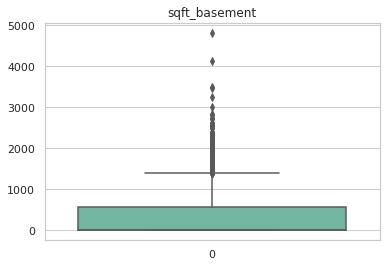

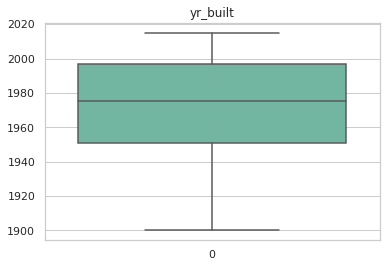

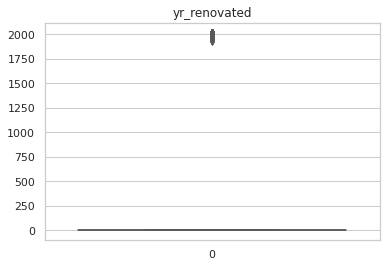

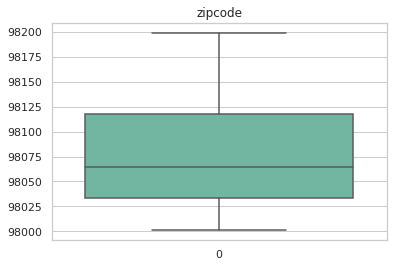

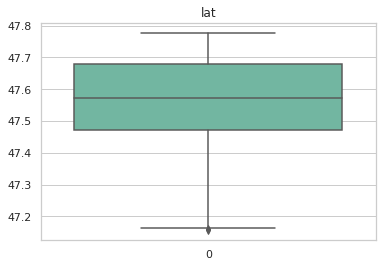

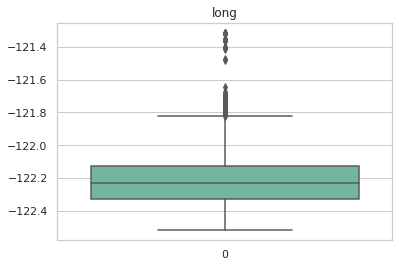

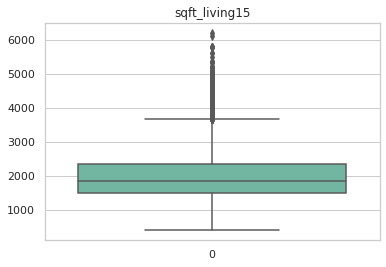

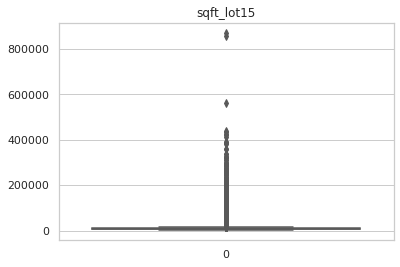

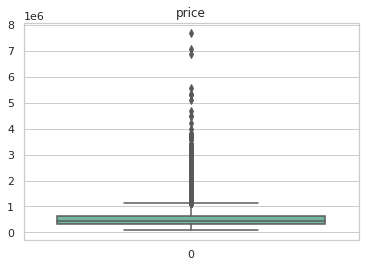

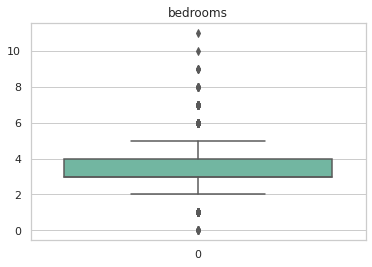

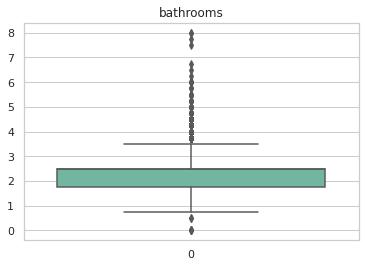

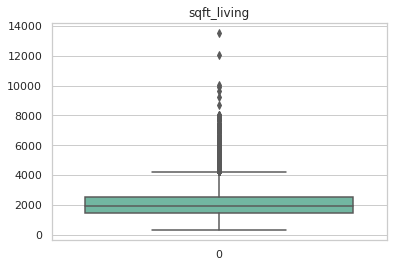

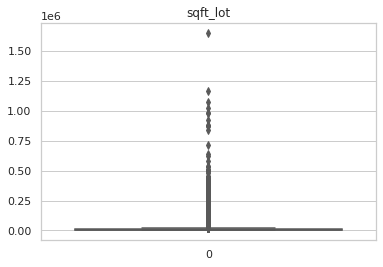

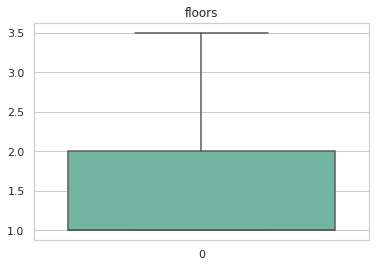

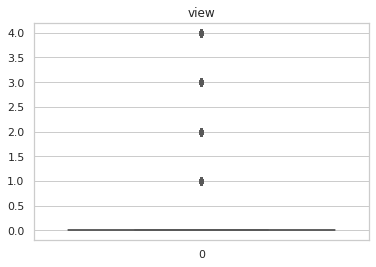

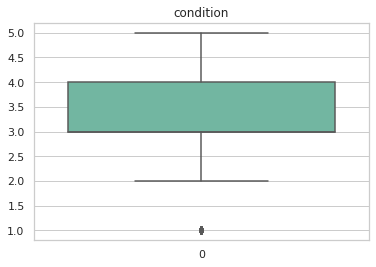

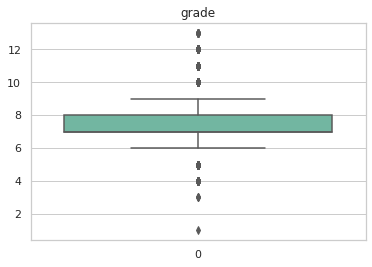

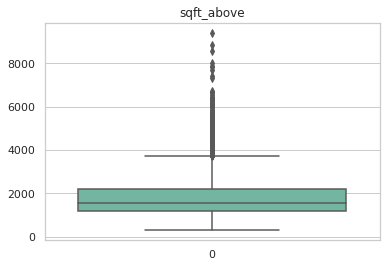

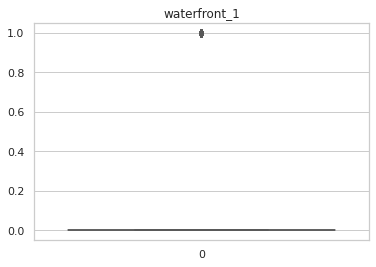

In [34]:
# Create boxplots for all numeric columns in the dataset
sns.set(style="whitegrid")
for col in df:
    sns.boxplot(data=df[col], orient="v", palette="Set2")
    plt.title(col)
    plt.show()

In [35]:

# Identify the columns with potential outliers
outlier_cols = ['sqft_basement', 'yr_built','zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors','condition', 'grade', 'sqft_above']

# Replace outliers with the upper and lower bounds
for col in outlier_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])


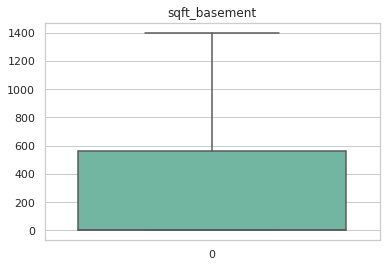

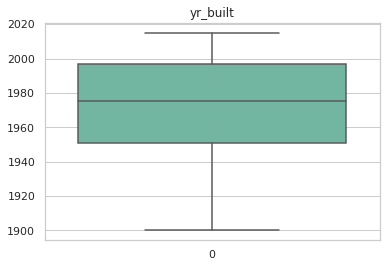

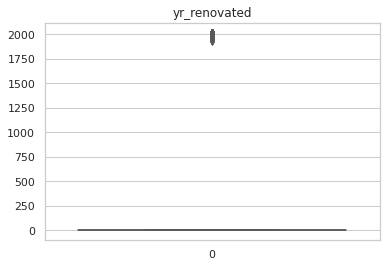

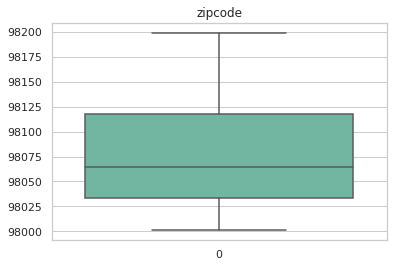

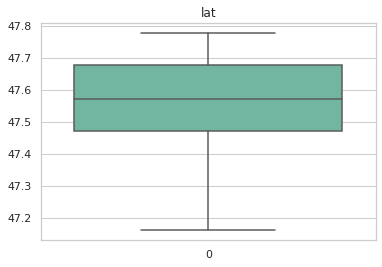

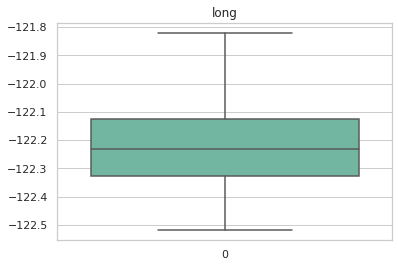

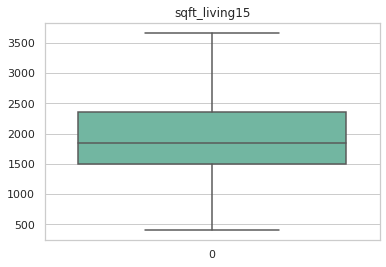

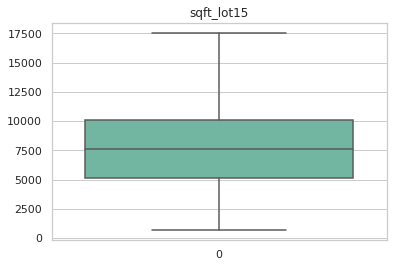

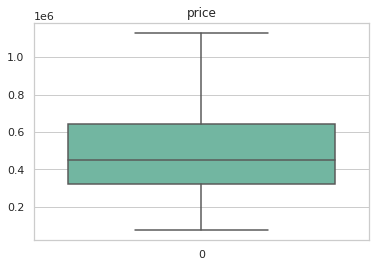

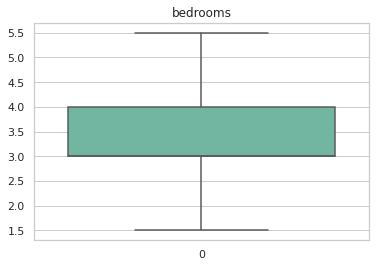

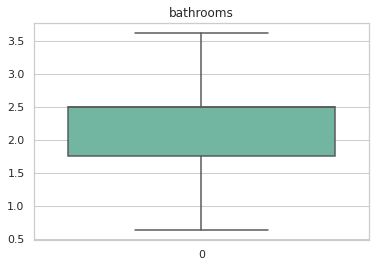

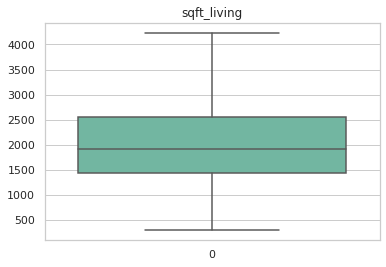

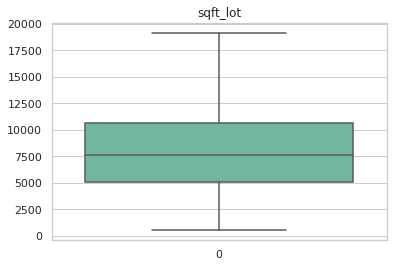

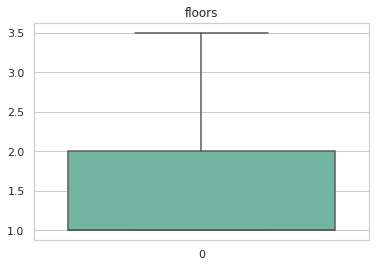

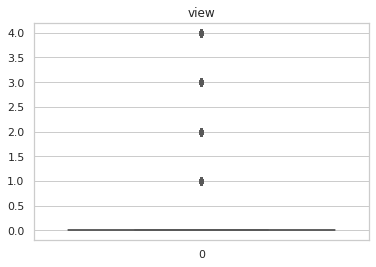

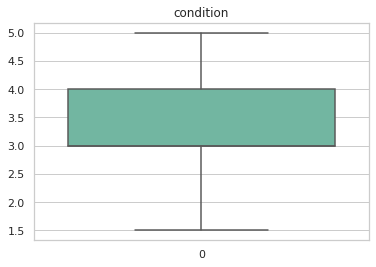

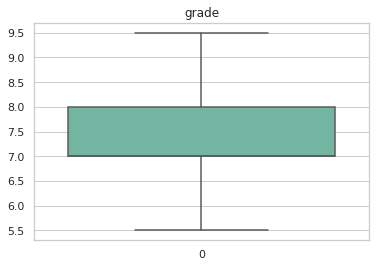

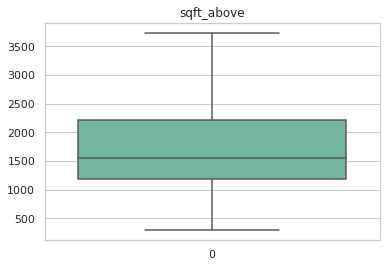

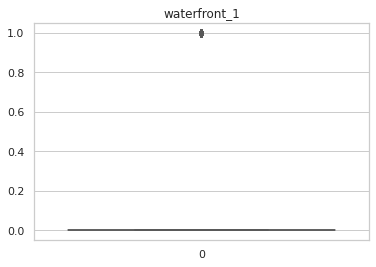

In [36]:
# Create boxplots for all numeric columns in the dataset
sns.set(style="whitegrid")
for col in df:
    sns.boxplot(data=df[col], orient="v", palette="Set2")
    plt.title(col)
    plt.show()

In [37]:
df=df.drop('waterfront_1',axis=1)

In [38]:
# normalize numerical features
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]] = scaler.fit_transform(df[["sqft_living", "sqft_lot", "sqft_above", "sqft_basement", "sqft_living15", "sqft_lot15"]])


In [39]:
df.head()

,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above
0,0.000000,1955.0,0,98178.0,47.5112,-122.257,0.288120,0.295685,221900.0,3.0,2.50,0.225631,0.275215,1.0,0,3.0,7.0,0.257971
1,0.285714,1951.0,1991,98125.0,47.7210,-122.319,0.395285,0.413332,538000.0,3.0,2.25,0.578020,0.360622,2.0,0,3.0,7.0,0.544928
2,0.000000,1933.0,0,98028.0,47.7379,-122.233,0.710655,0.438352,180000.0,2.0,2.50,0.121688,0.508584,1.0,0,3.0,6.0,0.139130
3,0.650000,1965.0,0,98136.0,47.5208,-122.393,0.294244,0.257238,604000.0,4.0,2.50,0.423374,0.240343,1.0,0,5.0,7.0,0.220290
4,0.000000,1987.0,0,98074.0,47.6168,-122.045,0.428965,0.405288,510000.0,3.0,2.00,0.352389,0.405579,1.0,0,3.0,8.0,0.402899


In [40]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [41]:
df.corr()

,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above
sqft_basement,1.000000,-0.144648,0.069185,0.086051,0.114491,-0.157266,0.178772,0.088764,0.294248,0.253624,0.200561,0.399561,0.099345,-0.204531,0.258710,0.180211,0.136364,-0.092503
yr_built,-0.144648,1.000000,-0.224874,-0.346869,-0.148123,0.417767,0.331623,0.057213,0.064247,0.135697,0.402371,0.333555,0.036435,0.395476,-0.053440,-0.364141,0.470996,0.441207
yr_renovated,0.069185,-0.224874,1.000000,0.064357,0.029397,-0.070746,-0.002732,0.025172,0.122046,0.014861,0.041975,0.054529,0.025429,0.006330,0.103917,-0.060881,0.015122,0.023480
zipcode,0.086051,-0.346869,0.064357,1.000000,0.267047,-0.573090,-0.283672,-0.298259,-0.043023,-0.132147,-0.162117,-0.206448,-0.286511,-0.048412,0.084827,0.003328,-0.191453,-0.271463
lat,0.114491,-0.148123,0.029397,0.267047,1.000000,-0.138735,0.048155,-0.119695,0.402520,-0.005153,0.019792,0.051304,-0.120522,0.039113,0.006156,-0.014860,0.112239,-0.006463
long,-0.157266,0.417767,-0.070746,-0.573090,-0.138735,1.000000,0.351330,0.364926,0.050794,0.120895,0.188871,0.260427,0.353966,0.100126,-0.080176,-0.107651,0.214541,0.366915
sqft_living15,0.178772,0.331623,-0.002732,-0.283672,0.048155,0.351330,1.000000,0.406465,0.626381,0.350336,0.439845,0.763878,0.391249,0.235775,0.275726,-0.092840,0.698435,0.734137
sqft_lot15,0.088764,0.057213,0.025172,-0.298259,-0.119695,0.364926,0.406465,1.000000,0.167144,0.154659,0.088803,0.334951,0.910903,-0.152479,0.145752,0.076148,0.207675,0.311740
price,0.294248,0.064247,0.122046,-0.043023,0.402520,0.050794,0.626381,0.167144,1.000000,0.298002,0.401642,0.701154,0.172300,0.254690,0.356121,0.041038,0.686612,0.602485
bedrooms,0.253624,0.135697,0.014861,-0.132147,-0.005153,0.120895,0.350336,0.154659,0.298002,1.000000,0.333088,0.506923,0.161892,0.130737,0.074858,0.021528,0.311382,0.419460


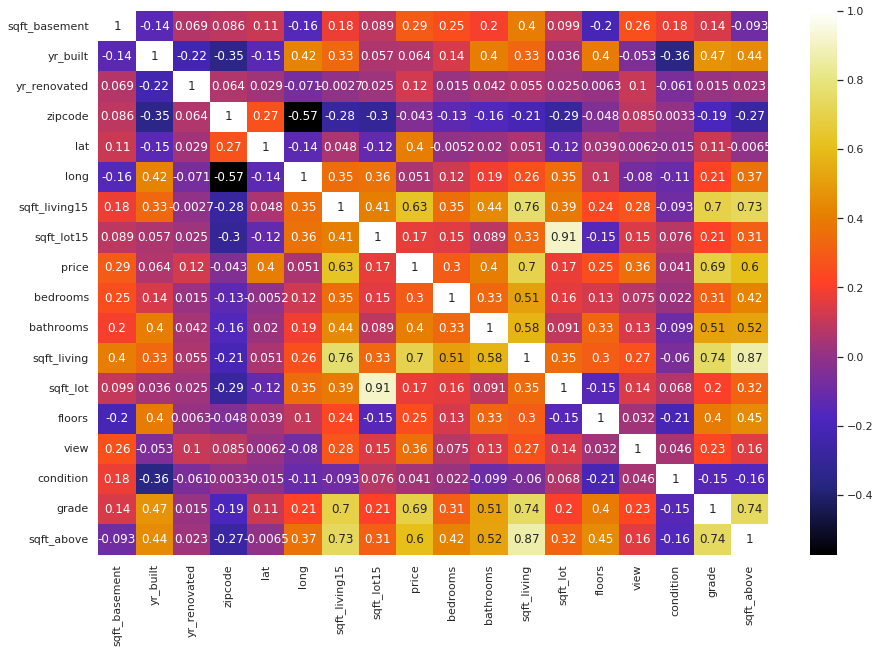

In [42]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

In [43]:
df=df.drop(['sqft_lot15','sqft_above'],axis=1)

In [44]:
import numpy as np

class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth#determines the maximum depth of the decision tree that will be constructed
        self.min_samples_split = min_samples_split#specifies the minimum number of samples required to split an internal node
        self.tree = None

    def mean_squared_error(self, y):
        return np.mean((y - np.mean(y)) ** 2)# Calculate mean squared error of targets

    def split_data(self, X, y, feature_idx, threshold):
        left_mask = X[:, feature_idx] <= threshold# find the indices of samples where the feature is less than the threshold value
        right_mask = X[:, feature_idx] > threshold # find the indices of samples where the feature is greater than or equal to the split value
        X_left, y_left = X[left_mask], y[left_mask] #create a new array of input samples for the left node using the left indices, #create a new array of labels for the left node using the left indice
        X_right, y_right = X[right_mask], y[right_mask]# create a new array of input samples for the right node using the right indices,# create a new array of labels for the right node using the right indices
        return X_left, y_left, X_right, y_right# return the new input and label arrays for the left and right nodes

    def find_best_split(self, X, y):
        ''' function to find the best split '''
        best_feature_idx, best_threshold, best_mse = None, None, np.inf
         #ensure that the first value you encounter will be greater than the current maximum value
         # loop over all the features in the dataset
        for feature_idx in range(X.shape[1]):
            # loop over all the unique feature values present in the data
            for threshold in np.unique(X[:, feature_idx]):
              # get current split
                X_left, y_left, X_right, y_right = self.split_data(X, y, feature_idx, threshold)
                #The code checks if the number of samples in the left and right subsets of the current dataset are less than a specified minimum threshold 
                if len(y_left) < self.min_samples_split or len(y_right) < self.min_samples_split:
                    continue
               # The split separates the data into two subsets: one on the left and the other on the right. The mean squared error is calculated for each subset separately using the method mean_squared_error()
                mse_left, mse_right = self.mean_squared_error(y_left), self.mean_squared_error(y_right)
                mse = mse_left + mse_right
                #It compares the MSE for each split to the current best MSE and updates the best feature index, best threshold, and best MSE if the current split has a lower MSE than the current best split.
                if mse < best_mse:
                    best_feature_idx, best_threshold, best_mse = feature_idx, threshold, mse
        return best_feature_idx, best_threshold, best_mse

    def build_tree(self, X, y, depth):
        if depth == self.max_depth or len(y) < self.min_samples_split:
            return np.mean(y)
        feature_idx, threshold, mse = self.find_best_split(X, y)
        if mse == np.inf:
            return np.mean(y)
        X_left, y_left, X_right, y_right = self.split_data(X, y, feature_idx, threshold)
        left_node = self.build_tree(X_left, y_left, depth + 1)
        right_node = self.build_tree(X_right, y_right, depth + 1)
        return {"feature_idx": feature_idx, "threshold": threshold, "left_node": left_node, "right_node": right_node}

    def fit(self, X, y):
        self.tree = self.build_tree(X, y, 0)
    def set_params(self, **params):
          '''function is used to set the values of the attributes of a decision tree object. The function takes a variable 
          number of keyword arguments (**params), 
          which are pairs of attribute names and their corresponding values that should be set for the decision tree object'''
          for param, value in params.items():
            setattr(self, param, value)
            return self

    def predict(self, X):
        def predict_row(row, node):
            if isinstance(node, float):
                return node
            if row[node["feature_idx"]] <= node["threshold"]:
                return predict_row(row, node["left_node"])
            else:
                return predict_row(row, node["right_node"])
        return np.array([predict_row(row, self.tree) for row in X])
    def mean_squared_errorr(self,y_true, y_pred):
   
      # Check if the lengths of both arrays are equal
      if len(y_true) != len(y_pred):
          raise ValueError("Length of y_true and y_pred should be the same.")
      
      # Calculate the squared differences between the true and predicted values
      squared_differences = [(y_true[i] - y_pred[i])**2 for i in range(len(y_true))]
      
      # Calculate the mean of the squared differences
      mse = sum(squared_differences) / len(squared_differences)
      
      return mse

In [45]:
#defining dependent and independent variable as y and x
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [46]:
from sklearn.model_selection import train_test_split


X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=.30,random_state=42)



In [47]:
regressor = DecisionTreeRegressor(min_samples_split=4, max_depth=4)
regressor.fit(X_train,Y_train)



In [48]:
y_pred = regressor.predict(X_test)

In [49]:
import numpy as np
def mean_squared_error(y_true, y_pred):
    """
    Calculates the mean squared error between y_true and y_pred.
    :param y_true: A list or array of true values
    :param y_pred: A list or array of predicted values
    :return: The mean squared error between y_true and y_pred
    """
    # Get the length of the arrays
    n = len(y_true)
    
    # Calculate the sum of squared differences
    sum_squared_diff = sum((y_true[i] - y_pred[i])**2 for i in range(n))
    
    # Calculate the mean squared error
    mse = sum_squared_diff / n
    
    return mse



In [50]:
mse = mean_squared_error(Y_test, y_pred)
mse

0.9982275865175497

In [ ]:
from sklearn.metrics import mean_squared_error
from random import randint
'''The defaultdict is a subclass of the built-in dict class.
 It overrides one method, __missing__, and adds one writable instance variable, default_factory'''
from collections import defaultdict

# Define the hyperparameters to be tuned
max_depth = [int(x) for x in np.linspace(5, 40, num = 11)]
min_samples_split = [2, 4, 6, 8, 10,12]
min_samples_leaf = [3, 4, 5,8,10,20]

# Define the number of iterations for hyperparameter tuning
n_iter = 10

# Define the number of folds for cross-validation
n_folds = None

# Define a function for k-fold cross-validation
def k_fold_cv(X, y, model, n_folds):
    # Initialize a dictionary to store the cross-validation scores
    cv_scores = defaultdict(list)

    # Divide the data into k folds
    fold_size = len(X) // n_folds
    #fold_starts that contains the starting index of each fold
    fold_starts = [i * fold_size for i in range(n_folds)]
    '''It uses a list comprehension to iterate over the range of n_folds and computes 
    the starting index of each fold as i * fold_size, where i is the fold number'''
    fold_ends = [(i + 1) * fold_size for i in range(n_folds)]
    #fold_ends that contains the ending index of each fold
    fold_ends[-1] = len(X)
    #this line updates the last value in fold_ends to be equal to the length of the dataset X

    # Perform k-fold cross-validation
    for i in range(n_folds):
        # Split the data into training and validation sets
        X_train = np.concatenate([X[:fold_starts[i]], X[fold_ends[i]:]])
        y_train = np.concatenate([y[:fold_starts[i]], y[fold_ends[i]:]])
        X_valid = X[fold_starts[i]:fold_ends[i]]
        y_valid = y[fold_starts[i]:fold_ends[i]]
  
        # Define the hyperparameters to be tuned
        params = {'max_depth': max_depth[randint(0, len(max_depth)-1)],
                  'min_samples_split': min_samples_split[randint(0, len(min_samples_split)-1)],
                  'min_samples_leaf': min_samples_leaf[randint(0, len(min_samples_leaf)-1)]}

        # Train the model with the current hyperparameters
        model.set_params(**params)
        model.fit(X_train, y_train)

        # Evaluate the model on the validation set
        y_pred = model.predict(X_valid)
        mse = mean_squared_error(y_valid, y_pred)

        # Store the cross-validation score
        cv_scores[mse].append(params)

    # Return the best hyperparameters and the corresponding mean squared error
    best_params = cv_scores[min(cv_scores)][0]
    best_mse = min(cv_scores)

    return best_params, best_mse


# Define the decision tree regressor model
dt = DecisionTreeRegressor()

# Perform the hyperparameter tuning using k-fold cross-validation and randomized search
best_params, best_mse = k_fold_cv(X, y, dt, n_folds=10)

# Print the best hyperparameters and the corresponding mean squared error
print("Best hyperparameters:", best_params)
print("Best mean squared error:", best_mse)

